<a href="https://colab.research.google.com/github/colstats/Python/blob/main/Computer_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem 1** (Working with images)

(a)  Load an RGB color image and display the RGB image as well as the R, G, and B channels separately. Describe what you observe in each component.

In [1]:
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
import matplotlib.pylab as plt

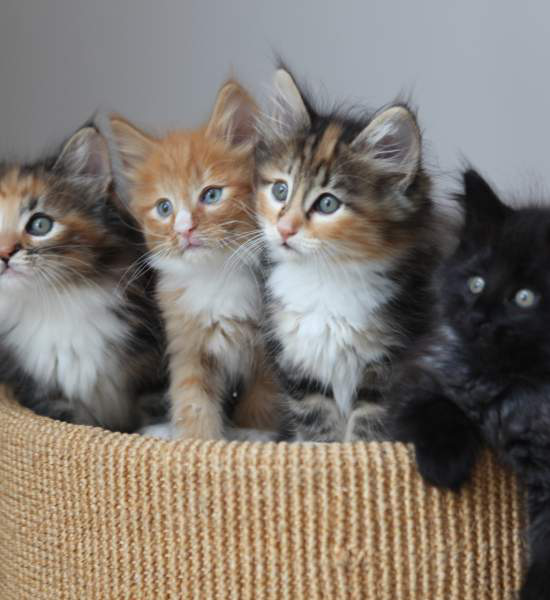

In [2]:
# image url
url = "https://placekitten.com/550/600"
# read and display image
image = io.imread(url) 
image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
cv2_imshow(image_2)
print('\n')

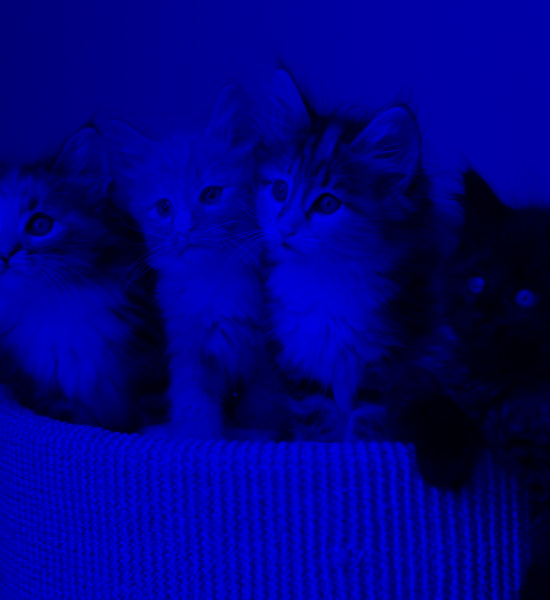

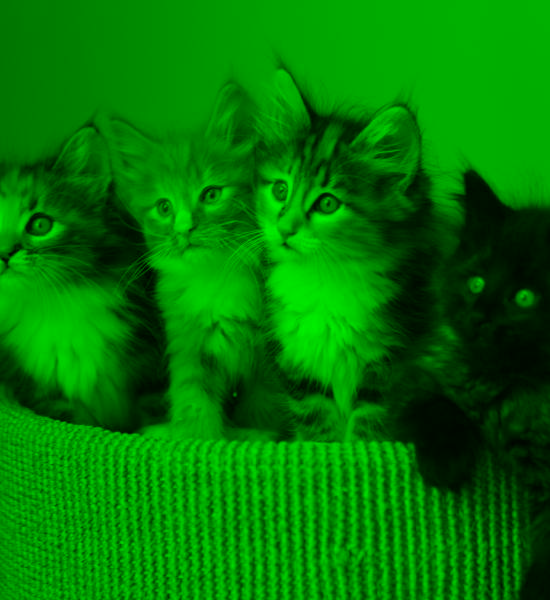

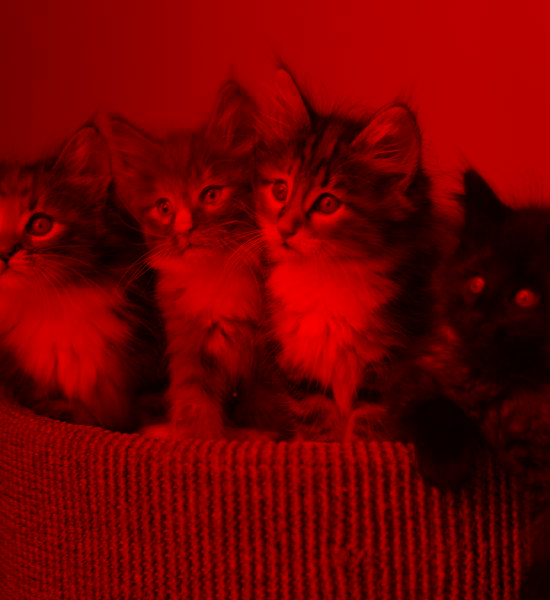

In [3]:
b = image.copy()
# set green and red channels to 0
b[:, :, 1] = 0
b[:, :, 2] = 0

g = image.copy()
# set blue and red channels to 0
g[:, :, 0] = 0
g[:, :, 2] = 0

r = image.copy()
# set blue and green channels to 0
r[:, :, 0] = 0
r[:, :, 1] = 0


# # RGB - Blue
# cv2_imshow('B-RGB', b)
cv2_imshow(b)

# # RGB - Green
# cv.imshow('G-RGB', g)
cv2_imshow(g)

# # RGB - Red
# cv.imshow('R-RGB', r)
cv2_imshow(r)
# cv.waitKey(0)

When an image is displayed in only red channel, the image is only in red with different level of intensity. When the intensity goes up, the red color is more like black. When the intensity goes down, teh red is closer to white. Similar cases are observed in green and blue channel.

(b) Convert the RGB image to the HSV colorspace and display the H, S, and V channels separately. Describe your observations.

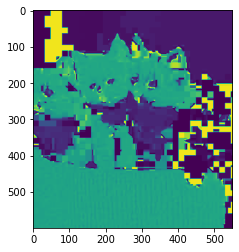

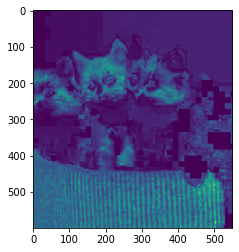

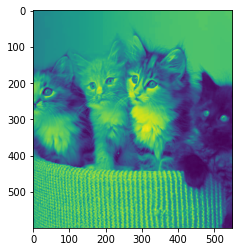

In [4]:
hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)
h_img, s_img, v_img = hsv_image[:, :, 0], hsv_image[:, :, 1], hsv_image[:, :, 2]
# cv2_imshow(h_img)
# cv2_imshow(s_img)
# cv2_imshow(v_img)
# plt.imshow(hsv_image)
plt.figure(1)
plt.imshow(h_img)
plt.figure(2)
plt.imshow(s_img)
plt.figure(3)
plt.imshow(v_img)
plt.show()

The hsv image displays the hue, saturation, and value channel. Hue contains the color three primary colors: red, green, blue. In our case, we don't have much red present. Saturation is purity and intensity of the image. In our case, the image is not very vivid, and more close to grayscale. Value is about lightness or darkness of the image. In our case, the left three cats are light color, and the last cat is dark.

---



(c) Detect blue pixels, de ned by having a hue in range [110; 130]. Your detected pixels should be in the form of a binary mask. Use this mask to display only the blue pixels of your original image, with the non-blue pixels displayed as black.

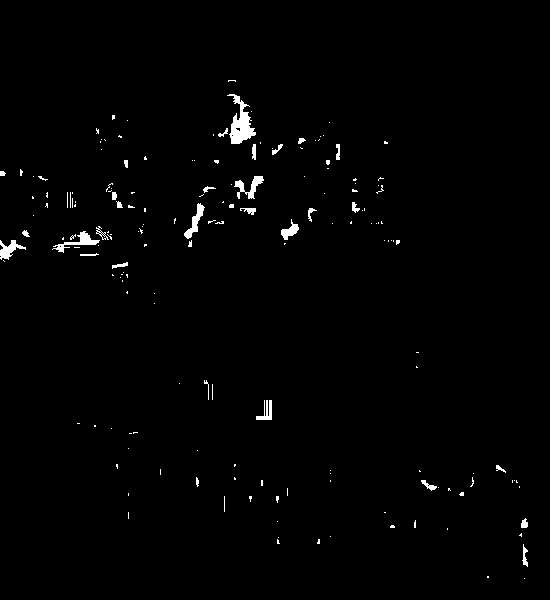

In [5]:
#defining the lower threshold and upper threshold for a range of black color in HSV
lower_blue = np.array([110,50,50])
upper_blue = np.array([130,255,255])
#masking the HSV image to get only black colors
mask = cv.inRange(hsv_image, lower_blue, upper_blue)
cv2_imshow(mask)

## **Problem 2** (Contrast Enhancement)

(a) Load and display a low-contrast grayscale image.

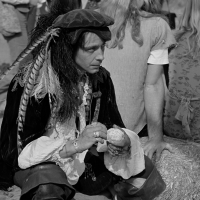

In [6]:
url = "https://sipi.usc.edu/database/preview/misc/5.3.01.png"
gray_image = io.imread(url) 
cv2_imshow(gray_image)
print('\n')

(b) Calculate and plot the image's histogram. Comment on the relation between the image's contrast and its histogram.


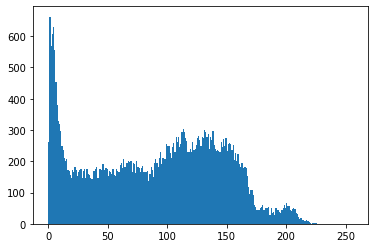

In [7]:
plt.hist(gray_image.ravel(),256,[0,256]); plt.show()

The histogram peak near 0. Zero means black, and 255 means white. The peak corresponds to the black shirt of the person image. The second histogram is near 130, corresponding to the dark gray background in the image.

(c) Recall, we derived in lecture that the cumulative distribution function (CDF) of the histogram is the theoretic optimal histogram-equalization transformation function. Plot the CDF of your histogram. Is this an appropriate equalization function? Why or why not?

(d) Apply the CDF as a transformation function to your image . Display your transformed image and its histogram. Has your image's histogram been equalized? Comment on the your original image and histogram vs. the transformed image and histogram.


In [8]:
hist,bins = np.histogram(gray_image.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * 255/ cdf[-1]
img_histeq = cdf_normalized[gray_image]

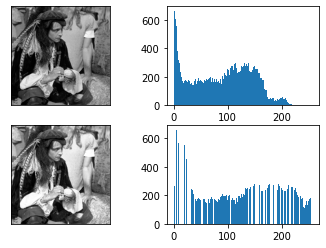

In [9]:
fig = plt.figure()
ax1 = plt.subplot(2,2,1) 
ax1.get_xaxis().set_visible(False) 
ax1.get_yaxis().set_visible(False) 
plt.imshow(gray_image,cmap=plt.cm.gray)
ax2 = plt.subplot(2,2,2) 
plt.hist(gray_image.ravel(),256,[0,256])
ax3 = plt.subplot(2,2,3) 
ax3.get_xaxis().set_visible(False) 
ax3.get_yaxis().set_visible(False) 
plt.imshow(img_histeq,cmap=plt.cm.gray) 
ax4 = plt.subplot(2,2,4) 
plt.hist(img_histeq.ravel(),256,[0,256]) 
plt.show()

The transformation is able to pick up the dark and light region, but it local details such as the man's figure in the image is not as good as the original gray image. 